<a href="https://colab.research.google.com/github/Basakrana/Car-Price-Prediction/blob/main/Carprice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor , BaggingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error , r2_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/Car details v3.csv")

In [ ]:
df.sample()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6753,Honda Amaze EX i-Vtech,2013,300000,120000,Petrol,Individual,Manual,Second Owner,18.0 kmpl,1198 CC,86.7 bhp,109Nm@ 4500rpm,5.0


In [ ]:
print(f"Number of Row : {df.shape[0]}\nNumber of Columns : {df.shape[1]}")

Number of Row : 8128
Number of Columns : 13


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [ ]:
# Check NaN Value
df.isna().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,221
engine,221


In [ ]:
# Describe Numiric Data
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [ ]:
# Describe non Numiric
df.describe(exclude=np.number)

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,8128,8128,8128,8128,8128,7907,7907,7913,7906
unique,2058,4,3,2,5,393,121,322,441
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,129,4402,6766,7078,5289,225,1017,377,530


In [ ]:
pd.DataFrame({'Count':df.shape[0],
              'Null':df.isnull().sum(),
              'Null %':df.isnull().mean() * 100,
              'Cardinality':df.nunique()
}).T


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
Count,8128.0,8128.0,8128.0,8128.0,8128.0,8128.0,8128.0,8128.0,8128.000000,8128.000000,8128.000000,8128.000000,8128.000000
Null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,221.000000,221.000000,215.000000,222.000000,221.000000
Null %,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.718996,2.718996,2.645177,2.731299,2.718996
Cardinality,2058.0,29.0,677.0,921.0,4.0,3.0,2.0,5.0,393.000000,121.000000,322.000000,441.000000,9.000000


In [ ]:
# Delete Nulls
df.dropna(inplace=True , ignore_index=True)

In [ ]:
print(f"Number of Row : {df.shape[0]}\nNumber of Columns : {df.shape[1]}")

Number of Row : 7906
Number of Columns : 13


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7906 entries, 0 to 7905
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7906 non-null   object 
 1   year           7906 non-null   int64  
 2   selling_price  7906 non-null   int64  
 3   km_driven      7906 non-null   int64  
 4   fuel           7906 non-null   object 
 5   seller_type    7906 non-null   object 
 6   transmission   7906 non-null   object 
 7   owner          7906 non-null   object 
 8   mileage        7906 non-null   object 
 9   engine         7906 non-null   object 
 10  max_power      7906 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7906 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 803.1+ KB


In [ ]:
Brands_of_car = df['name'].tolist()
for i in range(len(Brands_of_car)):
    car = Brands_of_car[i].split(' ')
    Brands_of_car[i] = car[0]
Brands_of_car = pd.Series(Brands_of_car)

In [ ]:
df['name'] = Brands_of_car

In [ ]:
print(f"Number of Unique Brand of Car {df['name'].nunique()}")

Number of Unique Brand of Car 31


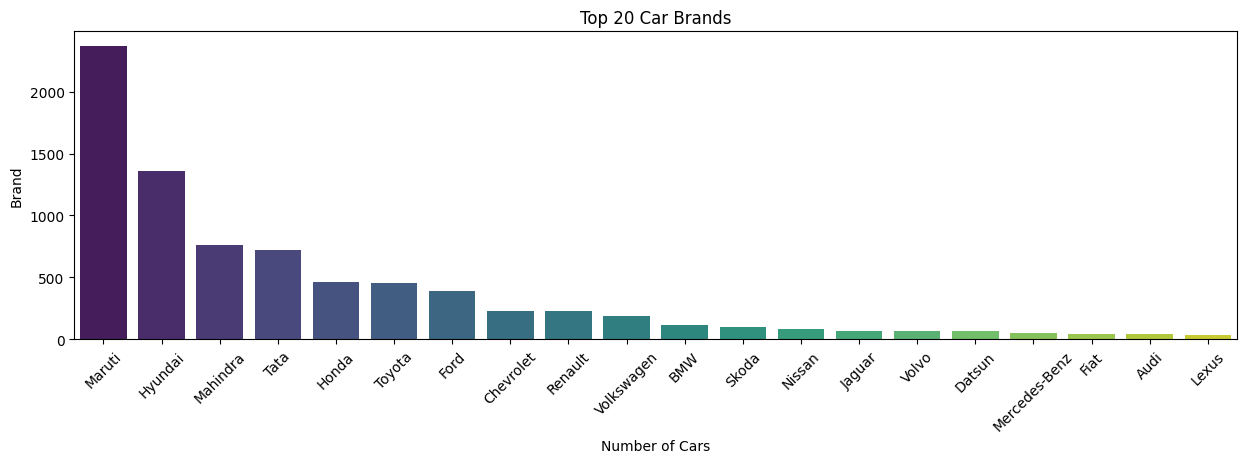

In [ ]:
# Top 20 brands
top_20 = df['name'].value_counts().head(20)

# Plot
plt.figure(figsize=(15,4))
sns.barplot(x=top_20.index, y=top_20.values,  palette="viridis")

plt.title("Top 20 Car Brands")
plt.xlabel("Number of Cars")
plt.ylabel("Brand")
plt.xticks(rotation=45)
plt.show()

In [ ]:
brand_production_per_Year = df.groupby('year')['name']

In [ ]:
print(f"Number of Cars Production in 2020 only '{len(brand_production_per_Year.get_group(2020))}'")

Number of Cars Production in 2020 only '74'


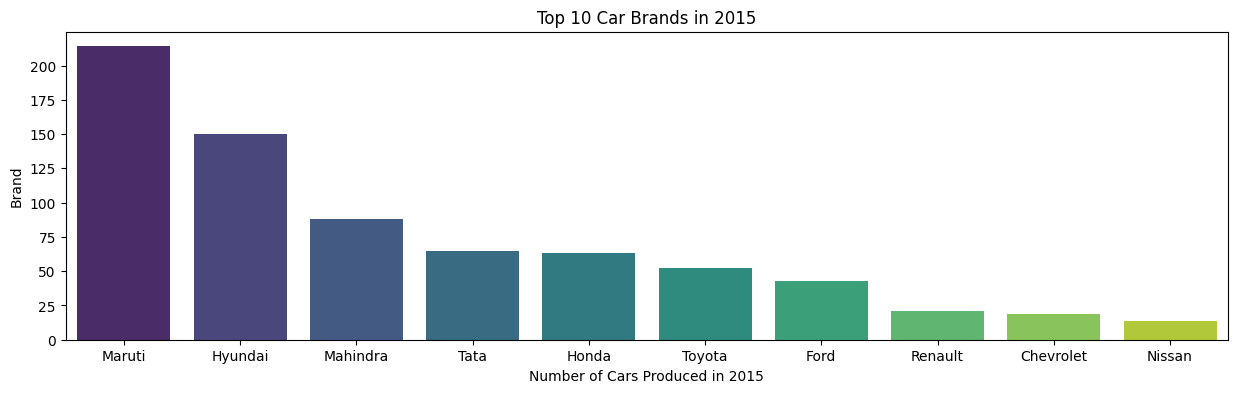

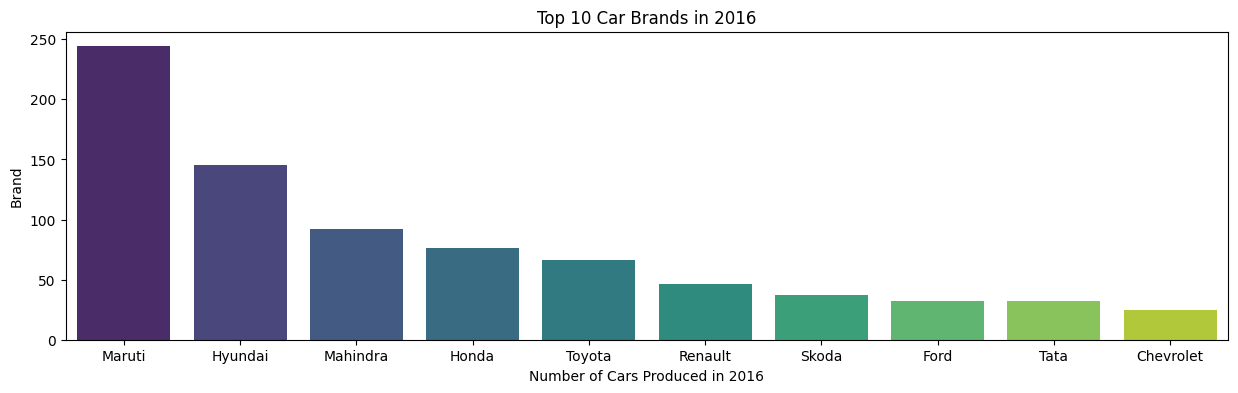

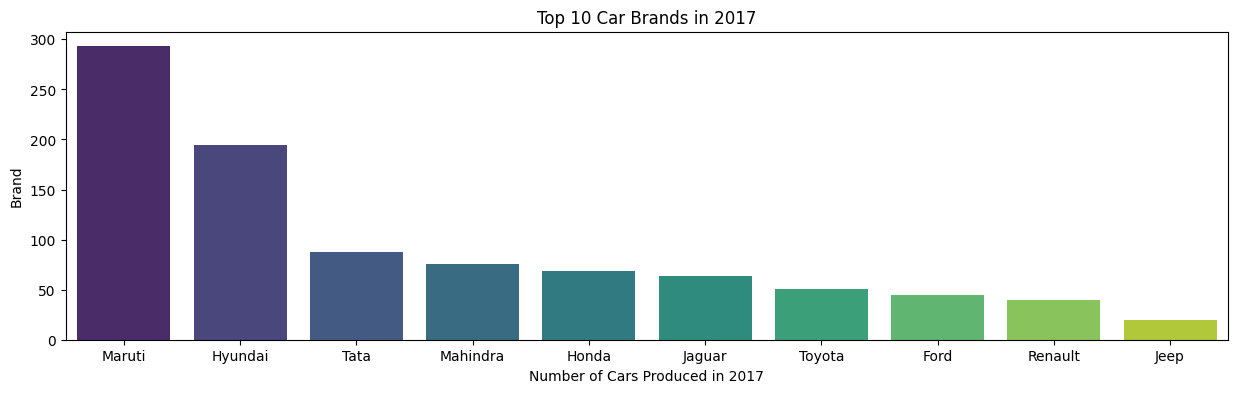

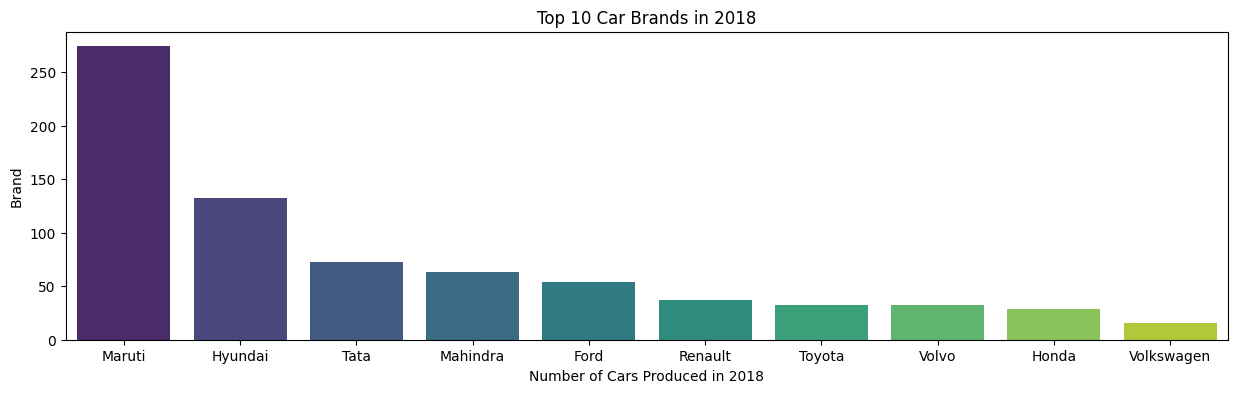

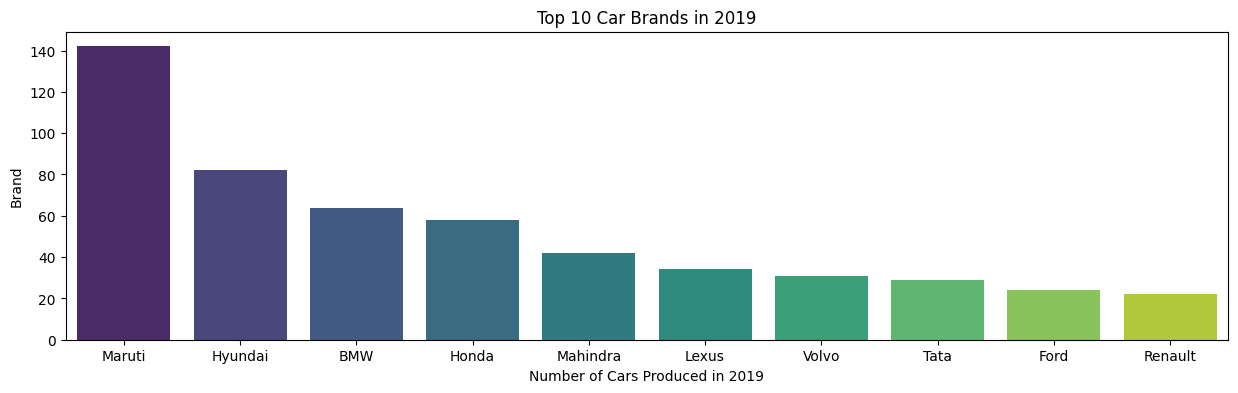

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get last five years
last_five_years = list(df['year'].value_counts().sort_index(ascending=False)[1:6].index)
last_five_years.sort()

# Loop through each year
for year in last_five_years:
    # Top 10 brands for that year
    top_10 = df[df['year'] == year]['name'].value_counts().head(10)

    # Plot
    plt.figure(figsize=(15,4))
    sns.barplot(x=top_10.index, y=top_10.values, palette="viridis")

    plt.title(f"Top 10 Car Brands in {year}")
    plt.xlabel(f"Number of Cars Produced in {year}")
    plt.ylabel("Brand")
    plt.show()

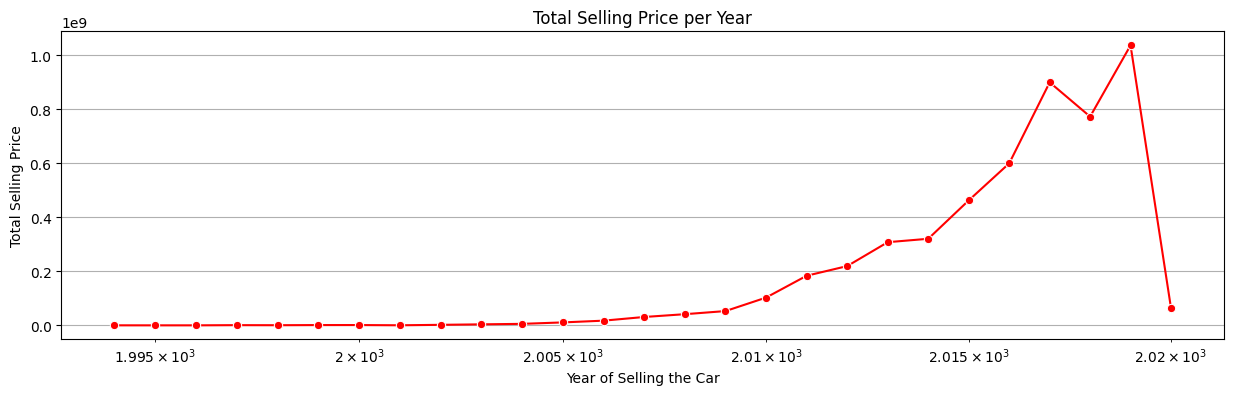

In [ ]:
sum_price_years = df.groupby('year')['selling_price'].sum().sort_index()

# Plot
plt.figure(figsize=(15,4))
sns.lineplot(x=sum_price_years.index, y=sum_price_years.values, marker='o', color='red')

plt.title("Total Selling Price per Year")
plt.xlabel("Year of Selling the Car")
plt.ylabel("Total Selling Price")
plt.xscale("log")  # If you want log scale like in Plotly
plt.grid(True)
plt.show()

In [ ]:
print(f"Best year for total car sales profit in the Market in '{sum_price_years.idxmax()}' is rs {sum_price_years.values.max():,.2f}")

Best year for total car sales profit in the Market in '2019' is rs 1,035,982,984.00


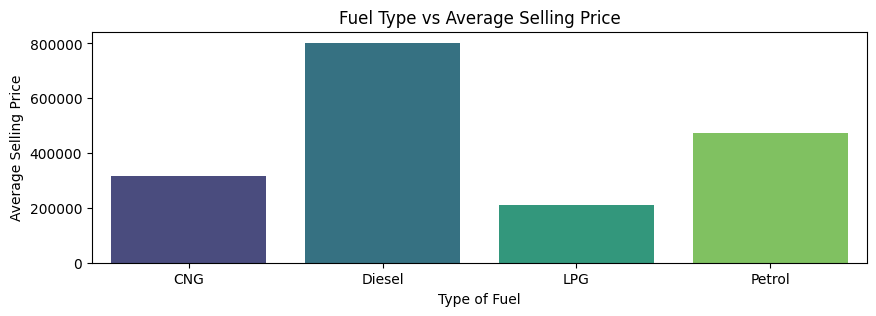

In [ ]:
price_type_fuel = df.groupby('fuel')['selling_price'].mean()

# Plot
plt.figure(figsize=(10,3))
sns.barplot(x=price_type_fuel.index, y=price_type_fuel.values, palette='viridis')

plt.title("Fuel Type vs Average Selling Price")
plt.xlabel("Type of Fuel")
plt.ylabel("Average Selling Price")
plt.show()

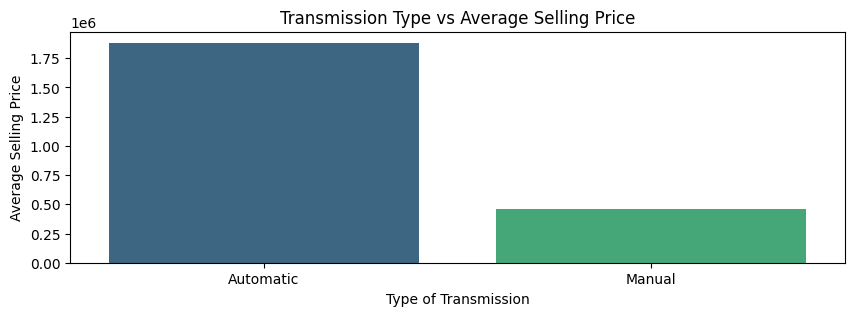

In [ ]:
selling_price_transmission = df.groupby('transmission')['selling_price'].mean()

# Plot
plt.figure(figsize=(10,3))
sns.barplot(x=selling_price_transmission.index, y=selling_price_transmission.values, palette='viridis')

plt.title("Transmission Type vs Average Selling Price")
plt.xlabel("Type of Transmission")
plt.ylabel("Average Selling Price")
plt.show()

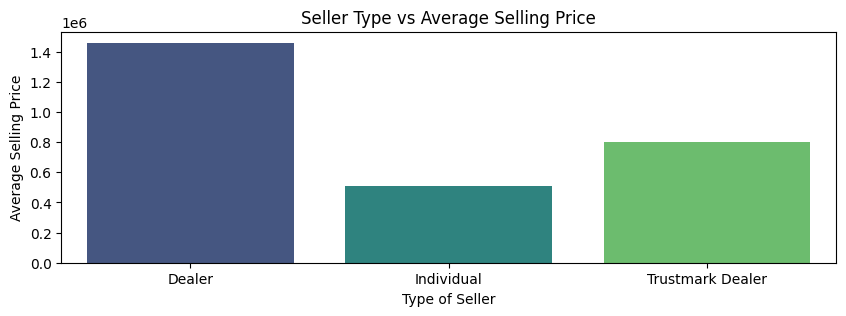

In [ ]:
# Average selling price per seller type
selling_price_seller = df.groupby('seller_type')['selling_price'].mean()

# Plot
plt.figure(figsize=(10,3))
sns.barplot(x=selling_price_seller.index, y=selling_price_seller.values, palette='viridis')

plt.title("Seller Type vs Average Selling Price")
plt.xlabel("Type of Seller")
plt.ylabel("Average Selling Price")
plt.show()

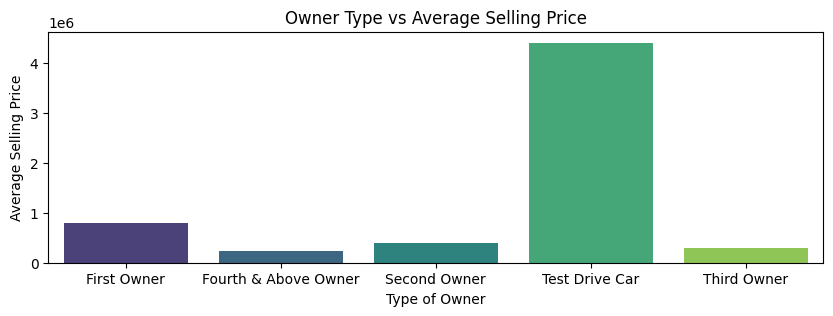

In [ ]:
# Average selling price per owner type
selling_price_owner = df.groupby('owner')['selling_price'].mean()

# Plot
plt.figure(figsize=(10,3))
sns.barplot(x=selling_price_owner.index, y=selling_price_owner.values, palette='viridis')

plt.title("Owner Type vs Average Selling Price")
plt.xlabel("Type of Owner")
plt.ylabel("Average Selling Price")
plt.show()

In [ ]:
df = df.replace({'mileage':'[A-Za-z/]','engine':'[A-Za-z]','max_power':'[A-Za-z]'},'',regex=True)
df['mileage'] = df['mileage'].astype(float)
df['engine'] = df['engine'].astype(float)
df['max_power'] = df['max_power'].astype(float)

In [ ]:
df.drop('torque' , axis = 1 , inplace = True)

In [ ]:
df['year'] = 2025 - df['year']
df.rename(columns={'year':'age'},inplace=True)

In [ ]:
df.sample(3)

,name,age,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
3100,Maruti,8,400000,110000,CNG,Individual,Manual,First Owner,26.60,998.0,58.16,5.0
1218,Hyundai,16,340000,40000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
46,Toyota,12,700000,99000,Diesel,Dealer,Manual,First Owner,12.99,2494.0,100.00,7.0


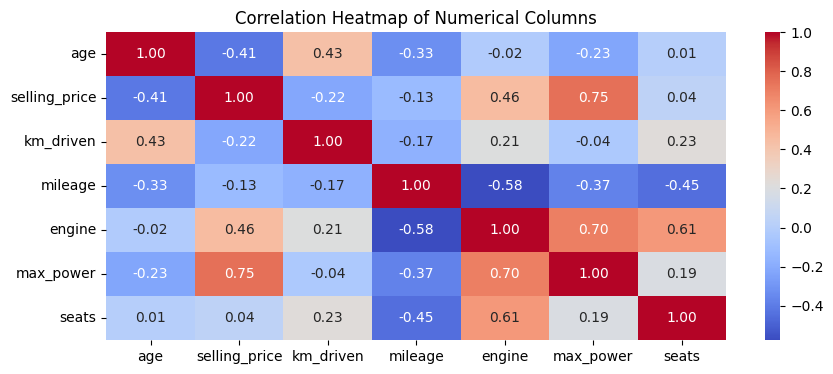

In [ ]:
numerical_cols = df.select_dtypes(include='number').columns.tolist()

# 1. Correlation heatmap for numerical columns
plt.figure(figsize=(10,4))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Columns")
plt.show()

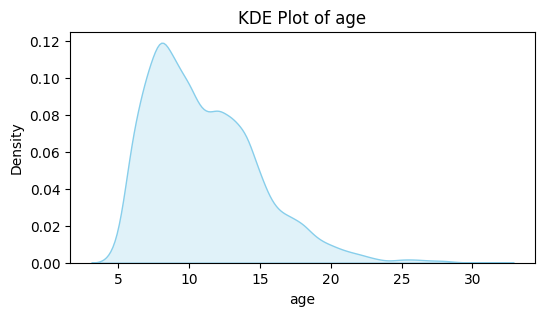

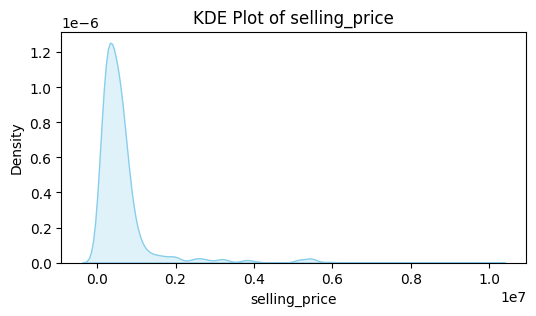

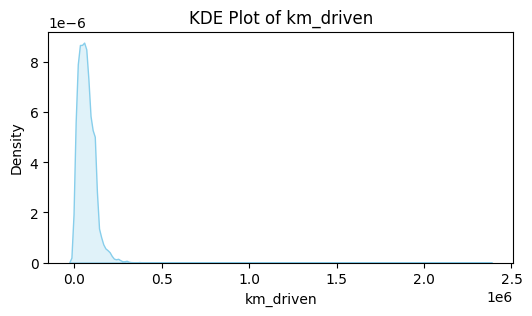

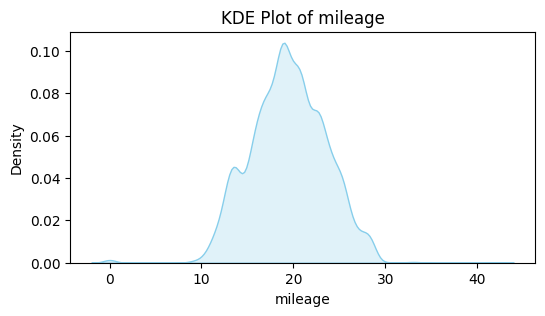

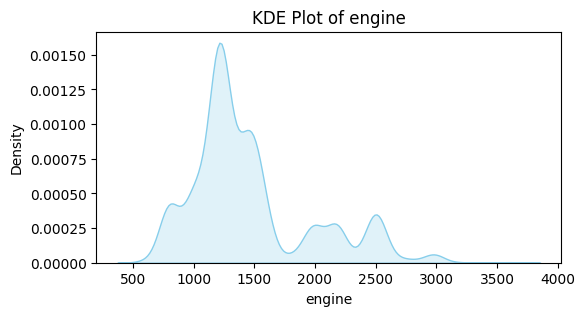

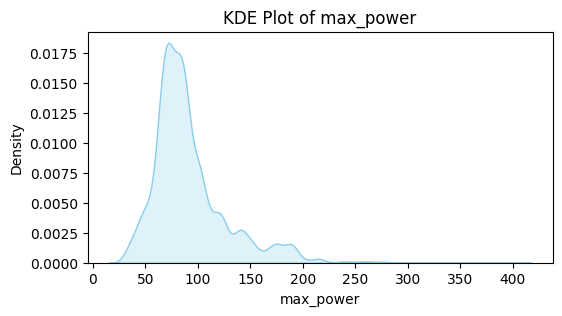

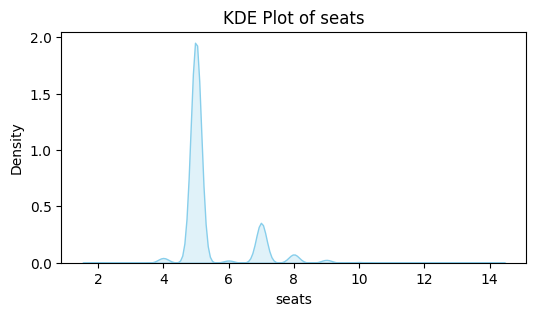

In [ ]:
for col in numerical_cols:
    plt.figure(figsize=(6,3))
    sns.kdeplot(df[col], fill=True, color='skyblue')
    plt.title(f"KDE Plot of {col}")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.show()

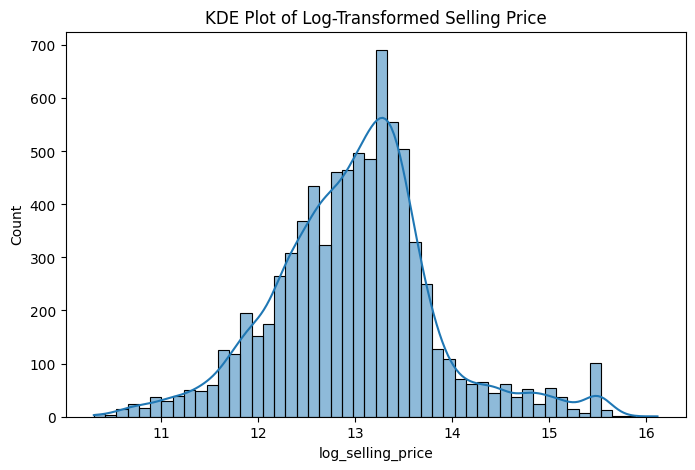

In [ ]:
df['log_selling_price'] = np.log1p(df['selling_price'])

# 3. KDE Plot
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='log_selling_price', bins = 50, kde = True,fill=True)
plt.title("KDE Plot of Log-Transformed Selling Price")
plt.show()

In [ ]:
numerical_cols

['age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']

In [ ]:
categorical_cols = ['name','fuel','seller_type','transmission','owner']
numerical_cols = [col for col in df.columns if col not in categorical_cols + ['selling_price','log_selling_price']]
X = df.drop(['selling_price','log_selling_price'], axis=1)
y = df['log_selling_price']

In [ ]:
# Convert all categorical columns to string
for col in categorical_cols:
    df[col] = df[col].astype(str)

In [ ]:
for col in numerical_cols:
    # Remove any non-numeric characters (like commas, spaces, text)
    df[col] = df[col].astype(str).str.replace(r'[^0-9.]', '', regex=True)
    df[col] = pd.to_numeric(df[col], errors='coerce')  # convert to numeric, invalid -> NaN

# Fill NaN with 0 or median
df[numerical_cols] = df[numerical_cols].fillna(0)  # or df[numerical_cols].fillna(df[numerical_cols].median())

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=44, shuffle=True)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('scaler', MinMaxScaler()),
            ('power', PowerTransformer(method='yeo-johnson'))
        ]), numerical_cols),
        ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_cols)
    ]
)

In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=10),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'KNN': KNeighborsRegressor(),
    'XGBoost': XGBRegressor()
}

In [ ]:
# 3. Apply preprocessing pipeline to all models
pipelines = {}
for name, model in models.items():
    pipelines[name] = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

In [ ]:
# 4. Train, evaluate, and cross-validate all models
for name, pipe in pipelines.items():
    # Cross-validation
    scores = cross_val_score(pipe, X, y, cv=10)
    print(f"{name} Cross-validation R²: {np.mean(scores) * 100:.2f}%")

    # Train pipeline
    pipe.fit(X_train, y_train)

    # Training & Testing score
    train_score = pipe.score(X_train, y_train)
    test_score = pipe.score(X_test, y_test)
    print(f"{name} Training R²: {train_score * 100:.2f}%")
    print(f"{name} Testing R²: {test_score * 100:.2f}%\n")

Linear Regression Cross-validation R²: 84.51%
Linear Regression Training R²: 84.67%
Linear Regression Testing R²: 84.84%

Random Forest Cross-validation R²: 93.35%
Random Forest Training R²: 96.34%
Random Forest Testing R²: 93.26%

Gradient Boosting Cross-validation R²: 92.93%
Gradient Boosting Training R²: 93.84%
Gradient Boosting Testing R²: 93.21%

Decision Tree Cross-validation R²: 89.75%
Decision Tree Training R²: 99.85%
Decision Tree Testing R²: 89.21%

KNN Cross-validation R²: 91.03%
KNN Training R²: 94.12%
KNN Testing R²: 91.09%

XGBoost Cross-validation R²: 94.08%
XGBoost Training R²: 98.16%
XGBoost Testing R²: 94.06%



In [ ]:
selected_model = pipelines['XGBoost']

# Predict
y_pred = selected_model.predict(X_test)

# Evaluate
r2_score_val = r2_score(y_test, y_pred)
print(f"R² Score for XGBoost: {r2_score_val * 100:.2f}%")


R² Score for XGBoost: 94.06%


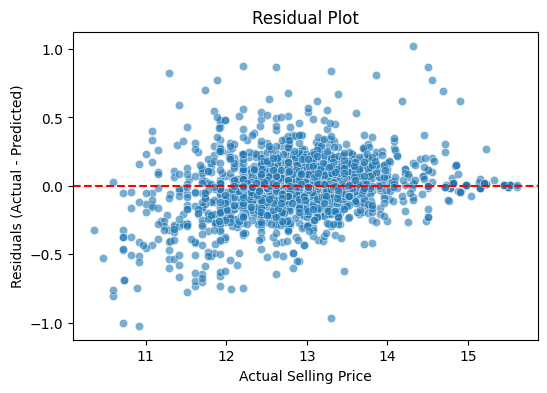

In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(6,4))
sns.scatterplot(x=y_test, y=residuals, alpha=0.6)
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Actual Selling Price")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.show()

In [ ]:
import joblib
joblib.dump(selected_model, 'xgboost_pipelinen.pkl')

['xgboost_pipelinen.pkl']

In [ ]:
df.sample()

,name,age,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,log_selling_price
534,Hyundai,9,850000,58000,Diesel,Individual,Manual,First Owner,19.67,1582.0,126.2,5.0,13.652993
